<p style="text-align:center">
    <a href="https://skills.network" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>


# **Scatter Plot**


Estimated time needed: **45** minutes


## Overview

In this lab, you will focus on creating and interpreting scatter plots to visualize relationships between variables and trends in the dataset. The provided dataset will be directly loaded into a pandas DataFrame, and various scatter plot-related visualizations will be created to explore developer trends, compensation, and preferences.



## Objectives


In this lab, you will:

- Create and analyze scatter plots to examine relationships between variables.

- Use scatter plots to identify trends and patterns in the dataset.

- Focus on visualizations centered on scatter plots for better data-driven insights.


## Setup: Working with the Database



**Install and import the required libraries**


In [1]:
!pip install pandas
!pip install matplotlib


import pandas as pd
import matplotlib.pyplot as plt

#### Step 1: Load the dataset


In [12]:
file_path = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/n01PQ9pSmiRX6520flujwQ/survey-data.csv"

df = pd.read_csv(file_path)



### Task 1: Exploring Relationships with Scatter Plots



#### 1. Scatter Plot for Age vs. Job Satisfaction



Visualize the relationship between respondents' age (`Age`) and job satisfaction (`JobSatPoints_6`). Use this plot to identify any patterns or trends.




([0, 1, 2, 3, 4, 5, 6, 7],
 [Text(0, 0, 'Under 18 years old'),
  Text(1, 0, '18-24 years old'),
  Text(2, 0, '25-34 years old'),
  Text(3, 0, '35-44 years old'),
  Text(4, 0, '45-54 years old'),
  Text(5, 0, '55-64 years old'),
  Text(6, 0, '65 years or older'),
  Text(7, 0, 'Prefer not to say')])

<Figure size 1400x1000 with 0 Axes>

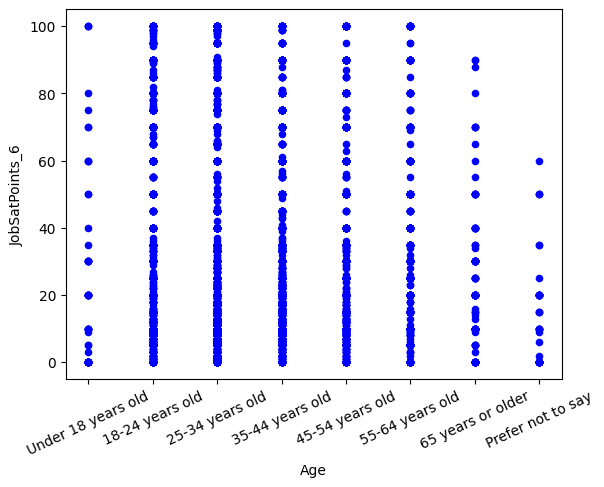

In [29]:
## Write your code here
df = df.dropna(subset = ['JobSatPoints_6'])
age_order = [
    'Under 18 years old',
    '18-24 years old',
    '25-34 years old',
    '35-44 years old',
    '45-54 years old',
    '55-64 years old',
    '65 years or older',
    'Prefer not to say'
]

# Convert Age column to categorical and sort
df['Age'] = pd.Categorical(df['Age'], categories=age_order, ordered=True)
df = df.sort_values('Age')

plt.figure(figsize = (14,10))
df.plot( kind = 'scatter', x = 'Age', y = 'JobSatPoints_6', color = 'Blue') 
plt.xticks (rotation = 25)

#### 2. Scatter Plot for Compensation vs. Job Satisfaction


Explore the relationship between yearly compensation (`ConvertedCompYearly`) and job satisfaction (`JobSatPoints_6`) using a scatter plot.


<Axes: xlabel='ConvertedCompYearly', ylabel='JobSatPoints_6'>

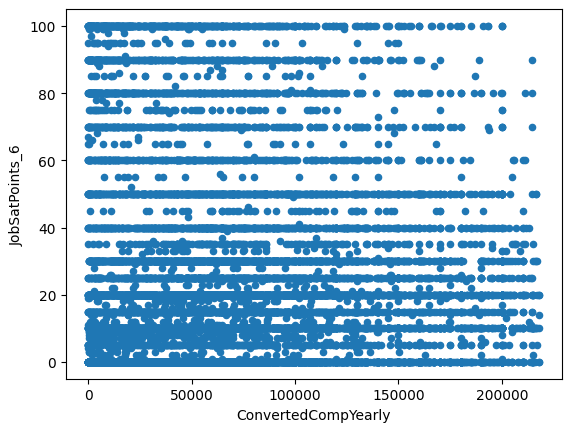

In [31]:
## Write your code here
df = df.dropna(subset = ['JobSatPoints_6', 'ConvertedCompYearly'])
Q1 = df['ConvertedCompYearly'].quantile(0.25)
Q3 = df['ConvertedCompYearly'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
df = df[(df['ConvertedCompYearly'] >= lower_bound) & (df['ConvertedCompYearly'] <= upper_bound)]


df.plot(kind = 'scatter', x= 'ConvertedCompYearly', y = 'JobSatPoints_6') 


### Task 2: Enhancing Scatter Plots


#### 1. Scatter Plot with Trend Line for Age vs. Job Satisfaction



Add a regression line to the scatter plot of Age vs. JobSatPoints_6 to highlight trends in the data.


In [35]:
!pip install seaborn

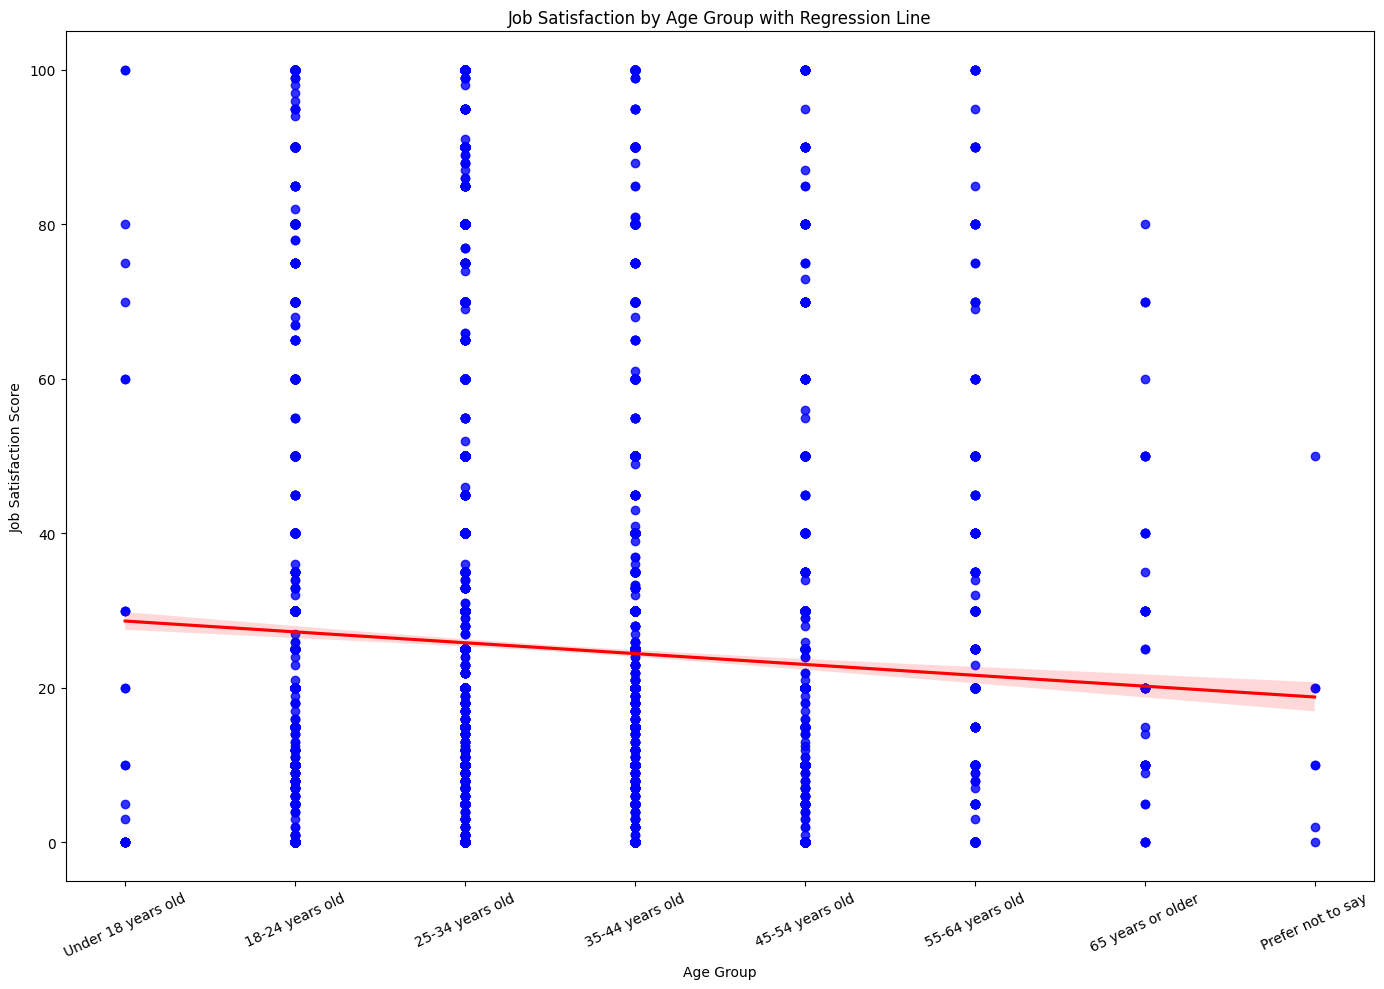

In [46]:
# Plot scatter + regression
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Drop missing values
df = df.dropna(subset=['JobSatPoints_6'])

# Define age order and convert to categorical
age_order = [
    'Under 18 years old',
    '18-24 years old',
    '25-34 years old',
    '35-44 years old',
    '45-54 years old',
    '55-64 years old',
    '65 years or older',
    'Prefer not to say'
]
df['Age'] = pd.Categorical(df['Age'], categories=age_order, ordered=True)

# Convert categorical Age to numeric for regression
df['AgeNumeric'] = df['Age'].cat.codes

# Plot scatter + regression
plt.figure(figsize=(14, 10))
sns.regplot(x='AgeNumeric', y='JobSatPoints_6', data=df,
            scatter_kws={'color': 'blue'}, line_kws={'color': 'red'})

# Custom x-ticks
plt.xticks(ticks=range(len(age_order)), labels=age_order, rotation=25)
plt.xlabel('Age Group')
plt.ylabel('Job Satisfaction Score')
plt.title('Job Satisfaction by Age Group with Regression Line')
plt.tight_layout()
plt.show()


#### 2. Scatter Plot for Age vs. Work Experience


Visualize the relationship between Age (`Age`) and Work Experience (`YearsCodePro`) using a scatter plot.


/tmp/ipykernel_1625/1420453823.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean['YearsCodePro'] = pd.to_numeric(df_clean['YearsCodePro'], errors='coerce')
/tmp/ipykernel_1625/1420453823.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean['AgeNumeric'] = df_clean['Age'].map(age_map)


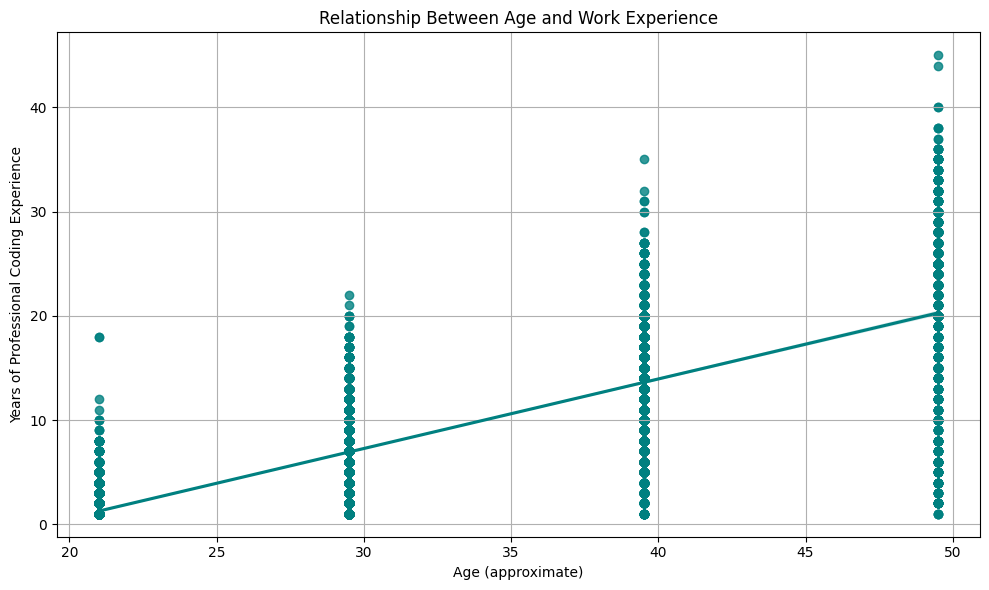

In [52]:
## Write your code here
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Drop rows with missing values
df_clean = df.dropna(subset=['Age', 'YearsCodePro'])

# Convert YearsCodePro to numeric
df_clean['YearsCodePro'] = pd.to_numeric(df_clean['YearsCodePro'], errors='coerce')

# Map Age to numeric midpoint values
age_map = {
    'Under 18 years old': 16,
    '18-24 years old': 21,
    '25-34 years old': 29.5,
    '35-44 years old': 39.5,
    '45-54 years old': 49.5,
    '55-64 years old': 59.5,
    '65 years or older': 70,
    'Prefer not to say': None
}
df_clean['AgeNumeric'] = df_clean['Age'].map(age_map)

# Drop rows with unmapped ages
df_clean = df_clean.dropna(subset=['AgeNumeric'])

# Plot
plt.figure(figsize=(10, 6))
sns.regplot(x='AgeNumeric', y='YearsCodePro', data=df_clean, color='teal')
plt.title('Relationship Between Age and Work Experience')
plt.xlabel('Age (approximate)')
plt.ylabel('Years of Professional Coding Experience')
plt.grid(True)
plt.tight_layout()
plt.show()



### Task 3: Combining Scatter Plots with Additional Features


#### 1. Bubble Plot of Compensation vs. Job Satisfaction with Age as Bubble Size



Create a bubble plot to explore the relationship between yearly compensation (`ConvertedCompYearly`) and job satisfaction (`JobSatPoints_6`), with bubble size representing age.


<Axes: xlabel='ConvertedCompYearly', ylabel='JobSatPoints_6'>

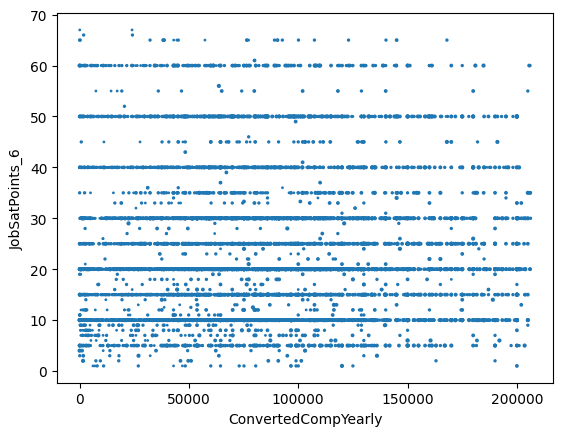

In [61]:
df = df.dropna(subset=['ConvertedCompYearly','JobSatPoints_6'])

Q1 = df['ConvertedCompYearly'].quantile(0.25)
Q3 = df['ConvertedCompYearly'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
df = df[(df['ConvertedCompYearly'] >= lower_bound) & (df['ConvertedCompYearly'] <= upper_bound)]

Q1 = df['JobSatPoints_6'].quantile(0.25)
Q3 = df['JobSatPoints_6'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
df = df[(df['JobSatPoints_6'] >= lower_bound) & (df['JobSatPoints_6'] <= upper_bound) & (df['JobSatPoints_6'] > 0) ]

df.plot(kind = 'scatter', x= 'ConvertedCompYearly', y = 'JobSatPoints_6', s = 'AgeNumeric')

#### 2. Scatter Plot for Popular Programming Languages by Job Satisfaction


Visualize the popularity of programming languages (`LanguageHaveWorkedWith`) against job satisfaction using a scatter plot. Use points to represent satisfaction levels for each language.


/tmp/ipykernel_1625/4233871282.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_lang['LanguageHaveWorkedWith'] = df_lang['LanguageHaveWorkedWith'].str.split(';')


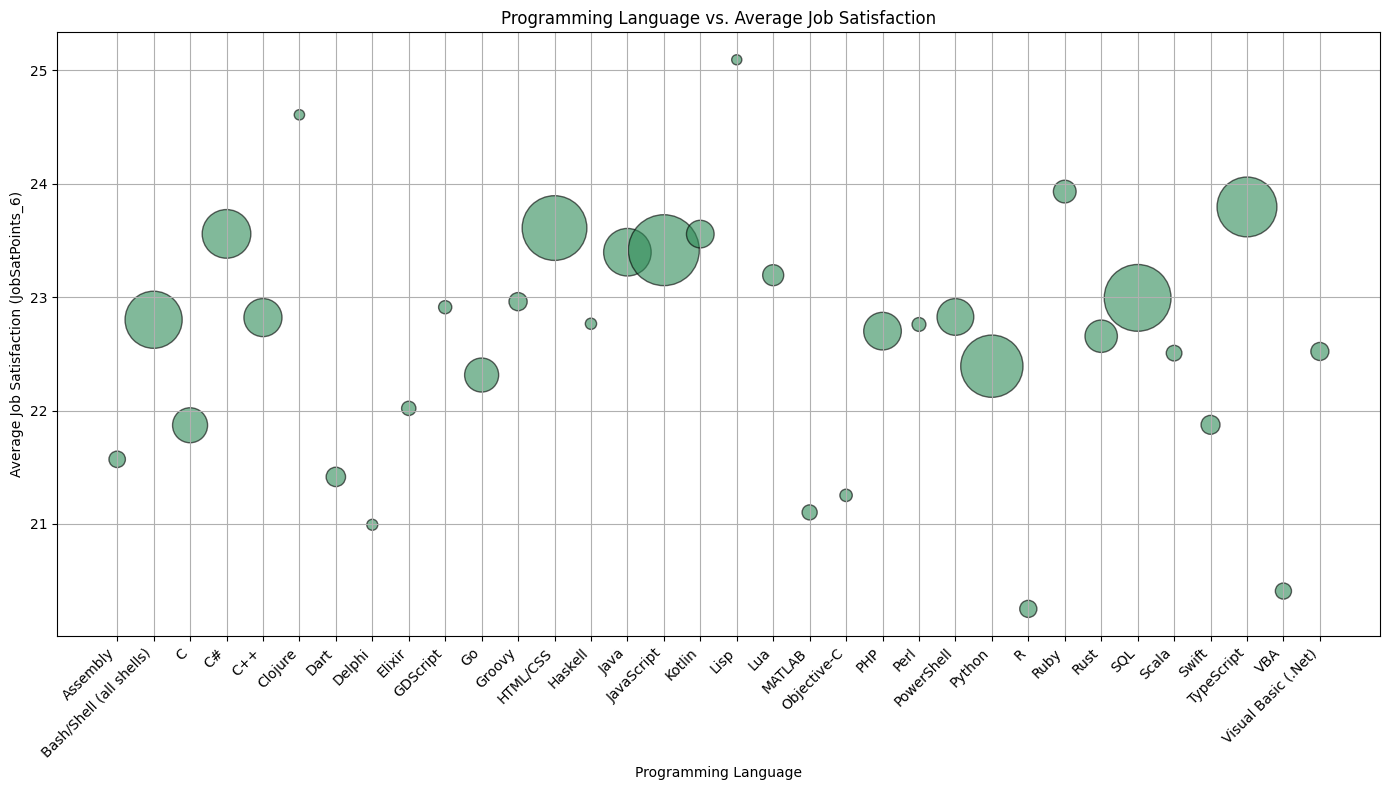

In [62]:
## Write your code here

import pandas as pd
import matplotlib.pyplot as plt

# Drop rows with missing values in relevant columns
df_lang = df.dropna(subset=['LanguageHaveWorkedWith', 'JobSatPoints_6'])

# Explode the languages (split by semicolon)
df_lang['LanguageHaveWorkedWith'] = df_lang['LanguageHaveWorkedWith'].str.split(';')
df_lang = df_lang.explode('LanguageHaveWorkedWith')

# Trim whitespace
df_lang['LanguageHaveWorkedWith'] = df_lang['LanguageHaveWorkedWith'].str.strip()

# Group by language and calculate average satisfaction and count
lang_satisfaction = df_lang.groupby('LanguageHaveWorkedWith').agg(
    AvgJobSat=('JobSatPoints_6', 'mean'),
    RespondentCount=('JobSatPoints_6', 'count')
).reset_index()

# Filter to show only languages with a reasonable number of respondents (e.g., > 100)
lang_satisfaction = lang_satisfaction[lang_satisfaction['RespondentCount'] > 100]

# Plot
plt.figure(figsize=(14, 8))
plt.scatter(
    lang_satisfaction['LanguageHaveWorkedWith'],
    lang_satisfaction['AvgJobSat'],
    s=lang_satisfaction['RespondentCount'] / 2,  # Bubble size scaled
    alpha=0.6,
    color='seagreen',
    edgecolors='black'
)

plt.xticks(rotation=45, ha='right')
plt.xlabel('Programming Language')
plt.ylabel('Average Job Satisfaction (JobSatPoints_6)')
plt.title('Programming Language vs. Average Job Satisfaction')
plt.grid(True)
plt.tight_layout()
plt.show()


### Task 4: Scatter Plot Comparisons Across Groups


#### 1. Scatter Plot for Compensation vs. Job Satisfaction by Employment Type


Visualize the relationship between yearly compensation (`ConvertedCompYearly`) and job satisfaction (`JobSatPoints_6`), categorized by employment type (`Employment`). Use color coding or markers to differentiate between employment types.


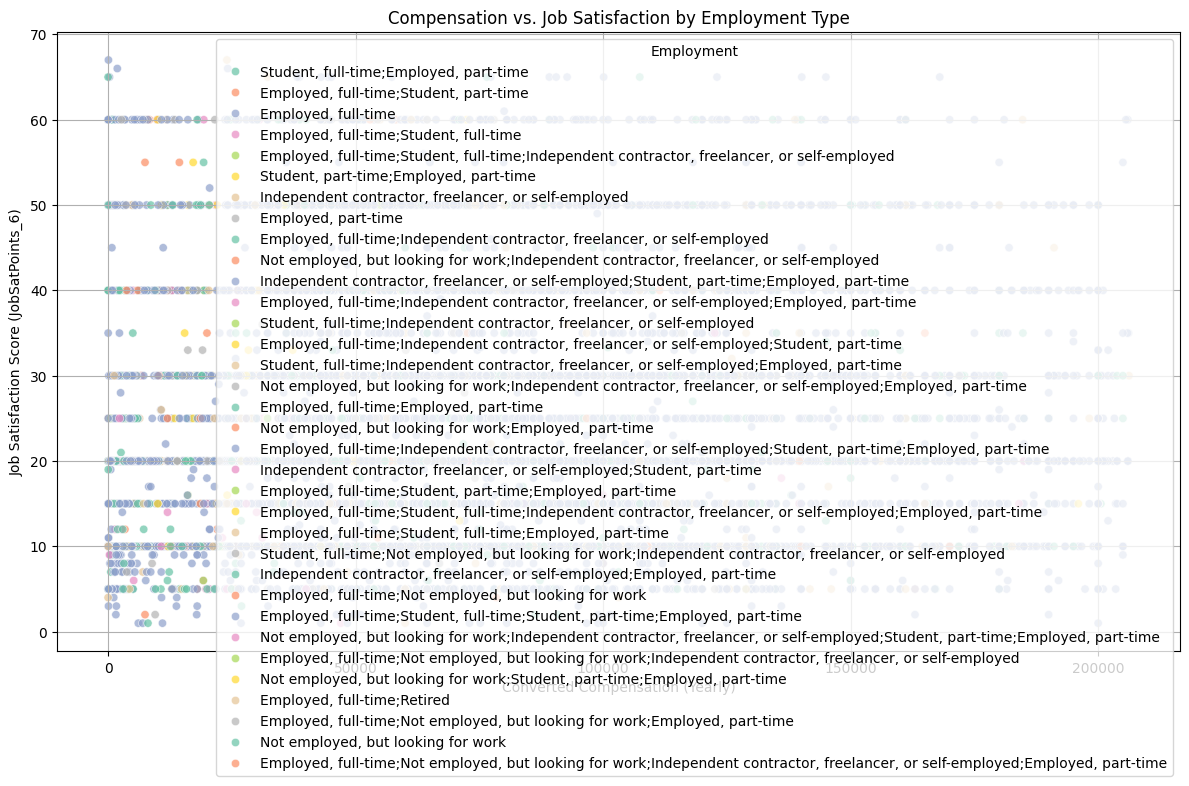

In [65]:
## Write your code here
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Drop missing values
df_filtered = df.dropna(subset=['ConvertedCompYearly', 'JobSatPoints_6', 'Employment'])

# Optional: filter out extreme outliers in compensation
df_filtered = df_filtered[df_filtered['ConvertedCompYearly'] < 300000]

# Set up the plot
plt.figure(figsize=(12, 8))
sns.scatterplot(
    data=df_filtered,
    x='ConvertedCompYearly',
    y='JobSatPoints_6',
    hue='Employment',
    alpha=0.7,
    palette='Set2'
)

# Plot formatting
plt.title('Compensation vs. Job Satisfaction by Employment Type')
plt.xlabel('Converted Compensation (Yearly)')
plt.ylabel('Job Satisfaction Score (JobSatPoints_6)')
plt.grid(True)
plt.tight_layout()
plt.show()


#### 2. Scatter Plot for Work Experience vs. Age Group by Country


Compare work experience (`YearsCodePro`) across different age groups (`Age`) and countries (`Country`). Use colors to represent different countries and markers for age groups.


/tmp/ipykernel_1625/4162618721.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean['YearsCodePro'] = pd.to_numeric(df_clean['YearsCodePro'], errors='coerce')


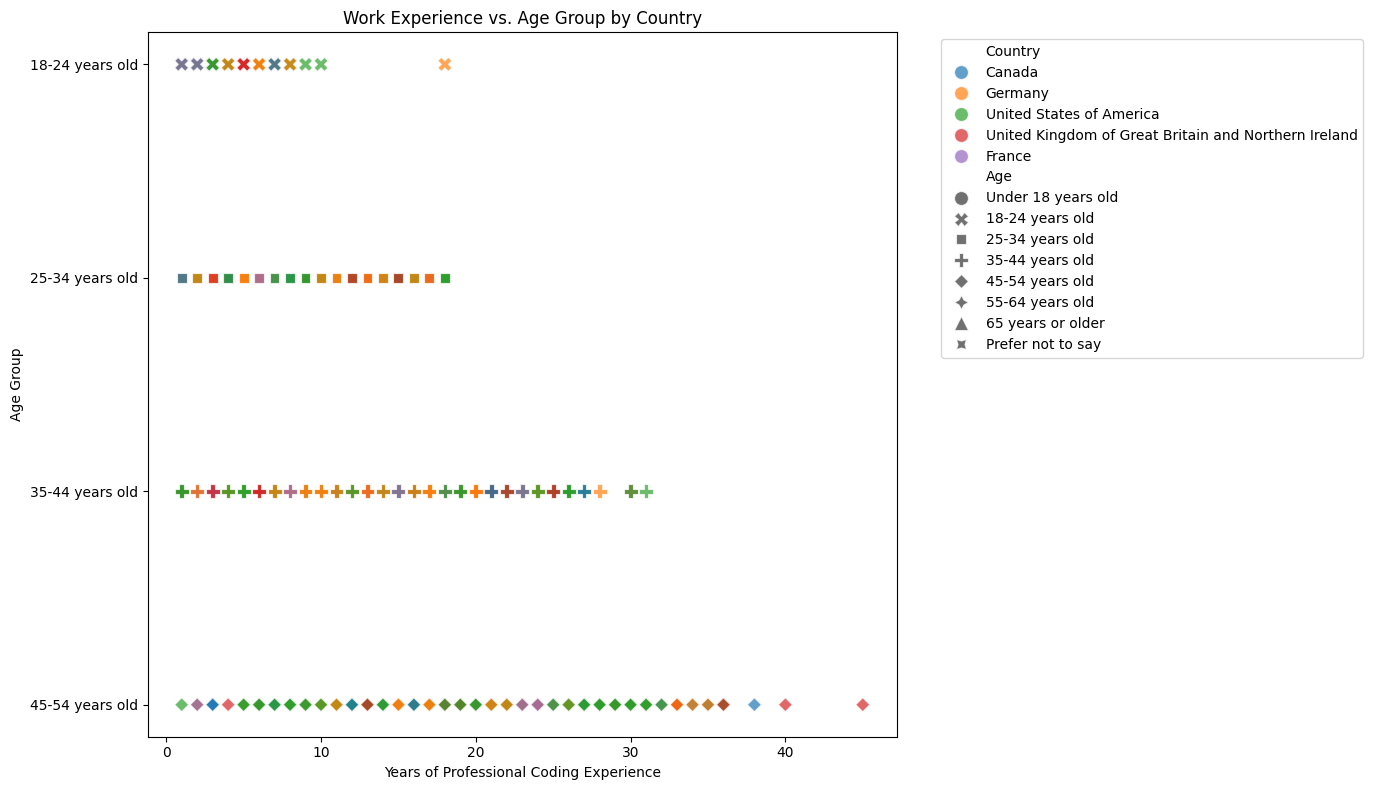

In [66]:
## Write your code here
## Write your code here
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Clean and prepare the data
df_clean = df.dropna(subset=['YearsCodePro', 'Age', 'Country'])
df_clean['YearsCodePro'] = pd.to_numeric(df_clean['YearsCodePro'], errors='coerce')
df_clean = df_clean.dropna(subset=['YearsCodePro'])

# Optional: Use only top 5 countries for clarity
top_countries = df_clean['Country'].value_counts().head(5).index
df_clean = df_clean[df_clean['Country'].isin(top_countries)]

# Set plot
plt.figure(figsize=(14, 8))
sns.scatterplot(
    data=df_clean,
    x='YearsCodePro',
    y='Age',
    hue='Country',
    style='Age',
    palette='tab10',
    s=100,
    alpha=0.7
)

# Customize
plt.title('Work Experience vs. Age Group by Country')
plt.xlabel('Years of Professional Coding Experience')
plt.ylabel('Age Group')
plt.xticks(rotation=0)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


### Final Step: Review


With these scatter plots, you will have analyzed data relationships across multiple dimensions, including compensation, job satisfaction, employment types, and demographics, to uncover meaningful trends in the developer community.


### Summary


After completing this lab, you will be able to:
- Analyze how numerical variables relate across specific groups, such as employment types and countries.
- Use scatter plots effectively to represent multiple variables with color, size, and markers.
- Gain insights into compensation, satisfaction, and demographic trends using advanced scatter plot techniques.


## Authors:
Ayushi Jain


### Other Contributors:
- Rav Ahuja
- Lakshmi Holla
- Malika


<!--## Change Log
|Date (YYYY-MM-DD)|Version|Changed By|Change Description|
|-|-|-|-|               
|2024-10-07|1.2|Madhusudan Moole|Reviewed and updated lab|                                                                                      
|2024-10-06|1.0|Raghul Ramesh|Created lab|-->


Copyright © IBM Corporation. All rights reserved.
